In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'TRAINU'
valid_path = 'TESTU'





In [2]:
# add preprocessing layer to the front of VGG
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False 

In [3]:
# useful for getting number of classes
folders = glob('TRAINU/*')
folders

['TRAINU\\despierto', 'TRAINU\\dormido']

In [4]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=resnet.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [5]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('TRAINU',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('TESTU',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 21903 images belonging to 2 classes.
Found 5477 images belonging to 2 classes.


In [7]:
'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 2000)'''

# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
685/685 [==============================] - 658s 961ms/step - loss: 0.8929 - accuracy: 0.6217 - val_loss: 0.5689 - val_accuracy: 0.7232
Epoch 2/30
685/685 [==============================] - 343s 501ms/step - loss: 0.7371 - accuracy: 0.6614 - val_loss: 0.8293 - val_accuracy: 0.7007
Epoch 3/30
685/685 [==============================] - 316s 461ms/step - loss: 0.7269 - accuracy: 0.6788 - val_loss: 0.5558 - val_accuracy: 0.7332
Epoch 4/30
685/685 [==============================] - 315s 460ms/step - loss: 0.7216 - accuracy: 0.6885 - val_loss: 0.7867 - val_accuracy: 0.7183
Epoch 5/30
685/685 [==============================] - 314s 458ms/step - loss: 0.7399 - accuracy: 0.6850 - val_loss: 1.2152 - val_accuracy: 0.4939
Epoch 6/30
685/685 [==============================] - 313s 456ms/step - loss: 0.7325 - accuracy: 0.6935 - val_loss: 1.4067 - val_accuracy: 0.6765
Epoch 7/30
685/685 [============================

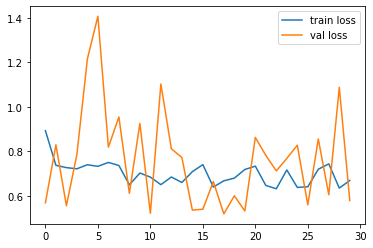

<Figure size 432x288 with 0 Axes>

In [10]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

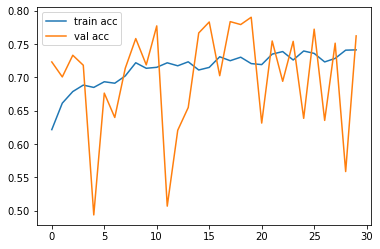

<Figure size 432x288 with 0 Axes>

In [9]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
import tensorflow as tf

from keras.models import load_model

model.save('vgg16-5epochs.h5')